In [1]:
library(tidyverse)
install.packages("lubridate")  
library(lubridate)
library(dplyr)
library(readr)
library(ggplot2)

players <- read_csv("/home/jovyan/work/dsci-100-student/project/players.csv")
sessions <- read_csv("/home/jovyan/work/dsci-100-student/project/sessions.csv")

merged_data <- left_join(players,sessions, by = "hashedEmail")

merged_data <- merged_data|>
    select(-hashedEmail,-original_start_time,-original_end_time)
    merged_data$Age[is.na(merged_data$Age)] <- mean(merged_data$Age, na.rm = TRUE)

merged_data


── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.4     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done

Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 1535 Columns: 5
── Colum

experience,subscribe,played_hours,name,gender,Age,start_time,end_time
<chr>,<lgl>,<dbl>,<chr>,<chr>,<dbl>,<chr>,<chr>
Pro,TRUE,30.3,Morgan,Male,9,08/08/2024 00:21,08/08/2024 01:35
Pro,TRUE,30.3,Morgan,Male,9,09/09/2024 22:30,09/09/2024 22:37
Pro,TRUE,30.3,Morgan,Male,9,08/08/2024 02:41,08/08/2024 03:25
Pro,TRUE,30.3,Morgan,Male,9,10/09/2024 15:07,10/09/2024 15:29
Pro,TRUE,30.3,Morgan,Male,9,05/05/2024 22:21,05/05/2024 23:17
Pro,TRUE,30.3,Morgan,Male,9,06/04/2024 22:24,06/04/2024 23:33
Pro,TRUE,30.3,Morgan,Male,9,20/04/2024 20:46,20/04/2024 21:48
Pro,TRUE,30.3,Morgan,Male,9,15/06/2024 16:37,15/06/2024 18:37
Pro,TRUE,30.3,Morgan,Male,9,05/05/2024 23:40,06/05/2024 00:55


**2. Do players with more experience tend to play more? (experience vs Avergae Played Hours)**

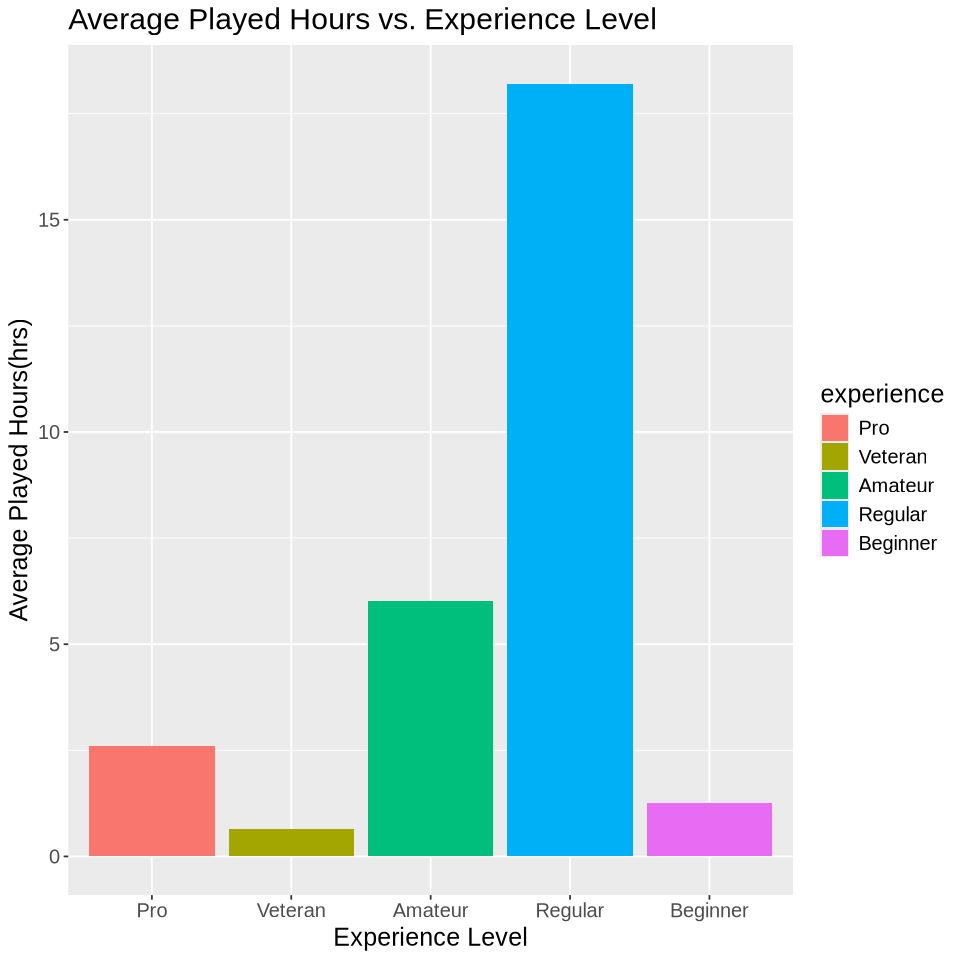

In [2]:
options(repr.plot.width = 8, repr.plot.height = 8) 

tidy_player_dataset <- players |> 
    mutate(experience = as_factor(experience), 
           subscribe = as_factor(subscribe), 
           gender = as_factor(gender)) |>
    mutate(subscribe = fct_recode(subscribe, "Subscribed" = "TRUE", "Not Subscribed" = "FALSE"))

avg_played_hours <- tidy_player_dataset |>
  group_by(experience) |> 
  summarise(avg_hours = mean(played_hours, na.rm = TRUE))


experience_bar <- ggplot(avg_played_hours, aes(x = experience, y = avg_hours, fill = experience)) +
  geom_bar(stat = "identity") +
  labs(title = "Average Played Hours vs. Experience Level",
       x = "Experience Level",
       y = "Average Played Hours(hrs)") +
  theme(text = element_text(size = 15))

experience_bar

Bar Plot: Average Played Hours vs. Experience Level

The bar plot shows that "Regular" players have the highest average playtime, significantly exceeding all other experience levels. "Veteran" players have the lowest average playtime, suggesting that higher experience does not necessarily lead to greater engagement. "Pro" and "Amateur" players fall in the middle range, while "Beginner" players have the lowest playtime overall. This pattern indicates that e "Regular" players appear to be the most engaged. Therefore, we should recruit "Regular" players as they most likely to contribute a large amount of data(greater play time). 

**4. Do subscribers tend to play more than non-subscribers? (subscribe vs total play time)**

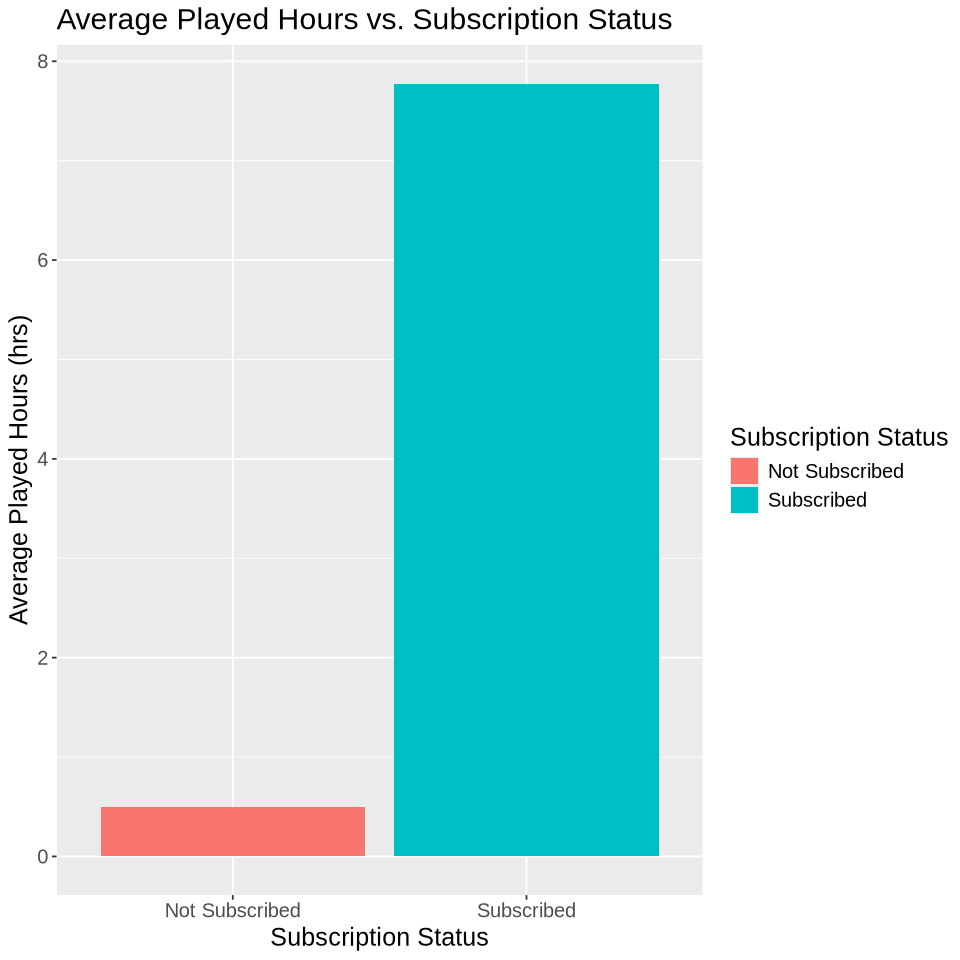

In [4]:
# Compute average played hours by subscription status
avg_played_hours_sub <- tidy_player_dataset |>
  group_by(subscribe) |>
  summarise(avg_hours = mean(played_hours, na.rm = TRUE)) 

# Create the bar plot
sub_bar <- ggplot(avg_played_hours_sub, aes(x = subscribe, y = avg_hours, fill = subscribe)) +
  geom_bar(stat = "identity") +
  labs(title = "Average Played Hours vs. Subscription Status",
       x = "Subscription Status",
       y = "Average Played Hours (hrs)",
       fill = "Subscription Status") +
  theme(text = element_text(size = 15))
sub_bar

Bar Plot: Average Played Hours vs. Subscription Status

The comparison between subscribed and non-subscribed players demonstrates a clear and significant difference in playtime. Subscribed players spend singnificantly more time playing than non-subscribers, suggesting that subscribed players are most liekly to contribute more to large amount of data. 